In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-dataset/train.csv


In [2]:
import pandas as pd
train = pd.read_csv("/kaggle/input/train-dataset/train.csv")

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#encoding gender values with 0s and 1s
train["Gender"] = train['Gender'].replace({'Male': 1, 'Female': 0})
print(train)

            id  CustomerId         Surname  CreditScore Geography  Gender  \
0            0    15674932  Okwudilichukwu          668    France       1   
1            1    15749177   Okwudiliolisa          627    France       1   
2            2    15694510           Hsueh          678    France       1   
3            3    15741417             Kao          581    France       1   
4            4    15766172       Chiemenam          716     Spain       1   
...        ...         ...             ...          ...       ...     ...   
165029  165029    15667085            Meng          667     Spain       0   
165030  165030    15665521       Okechukwu          792    France       1   
165031  165031    15664752            Hsia          565    France       1   
165032  165032    15689614          Hsiung          554     Spain       0   
165033  165033    15732798         Ulyanov          850    France       1   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  

In [6]:
train[["CreditScore", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember"]].describe()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,5.020353,55478.086689,1.554455,0.753954,0.497770
std,80.103340,2.806159,62817.663278,0.547154,0.430707,0.499997
min,350.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,597.000000,3.000000,0.000000,1.000000,1.000000,0.000000
50%,659.000000,5.000000,0.000000,2.000000,1.000000,0.000000
75%,710.000000,7.000000,119939.517500,2.000000,1.000000,1.000000
max,850.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


<Axes: >

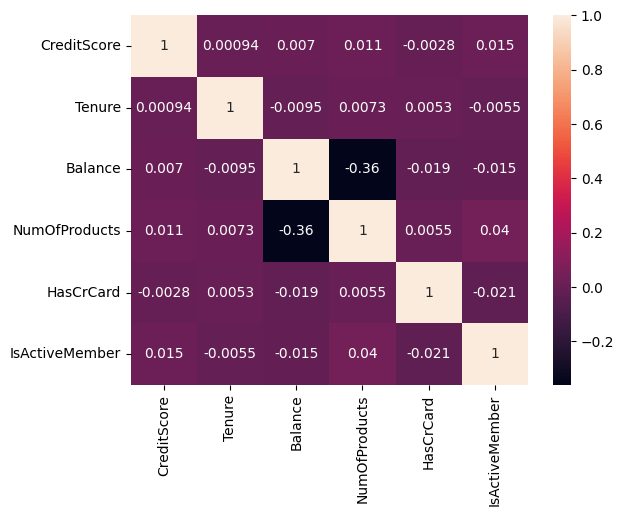

In [7]:
import seaborn as sns
sns.heatmap(train[["CreditScore", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember"]].corr(), annot = True)

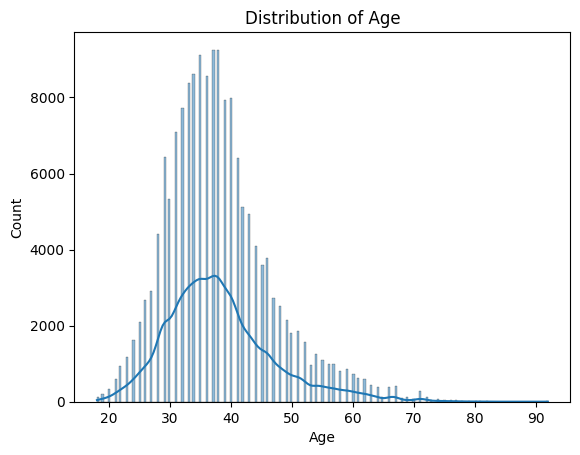

In [8]:
#Distribution of age
import matplotlib.pyplot as plt
sns.histplot(train['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

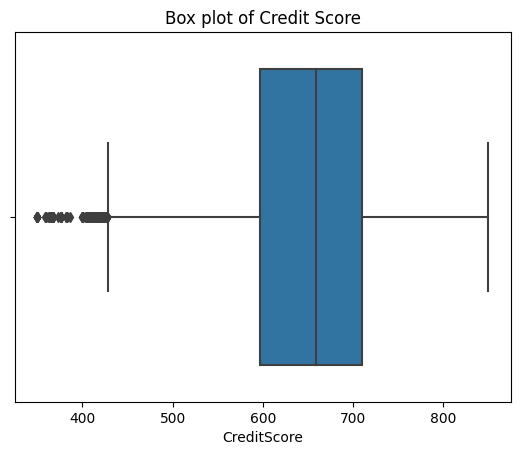

In [9]:
# Box Plot for Credit Score
sns.boxplot(x=train['CreditScore'])
plt.title('Box plot of Credit Score')
plt.show()

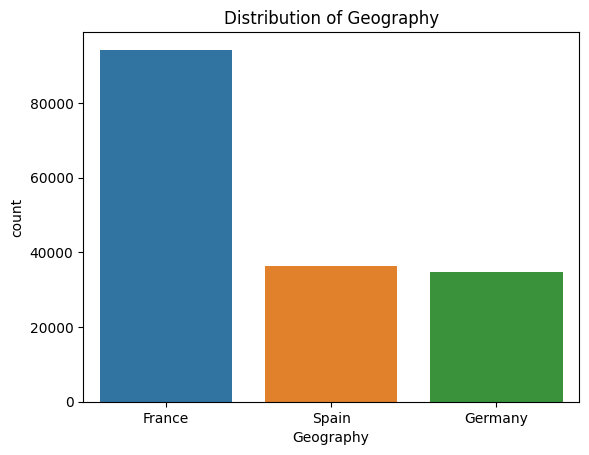

In [10]:
#Distribution as per geography
# Count Plot for Geography
sns.countplot(x='Geography', data=train)
plt.title('Distribution of Geography')
plt.show()

In [11]:
#Using pandas get dummies to encode the geography 
geo_dummies = pd.get_dummies(train['Geography'], prefix='Geo')
train  = pd.concat([train, geo_dummies], axis = 1)
train.drop("Geography", axis = 1, inplace = True)

In [12]:
#Scaling the numerical columns
from sklearn.preprocessing import StandardScaler
#list of numerical columns to normalize
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [13]:
#Checking for class imbalance
train["Exited"].value_counts()
#looks like there is class imbalance

Exited
0    130113
1     34921
Name: count, dtype: int64

In [14]:
#Since the class imbalance is severe, we choose to perform Borderline-SMOTE as opposed to regular SMOTE which we would have used in case of moderate imbalance
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.model_selection import train_test_split
X = train.drop('Exited', axis=1)
X.drop(columns = ["id", "CustomerId", "Surname"], axis = 1, inplace = True)
y = train['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = BorderlineSMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [15]:
#Try fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Initialize Logistic Regression
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.73      0.82     26052
           1       0.43      0.76      0.55      6955

    accuracy                           0.74     33007
   macro avg       0.68      0.75      0.68     33007
weighted avg       0.82      0.74      0.76     33007

Accuracy: 0.7394189111400612


In [16]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l2']}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit on the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate the best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     26052
           1       0.70      0.39      0.50      6955

    accuracy                           0.84     33007
   macro avg       0.78      0.67      0.70     33007
weighted avg       0.82      0.84      0.82     33007

Accuracy: 0.83536825521859


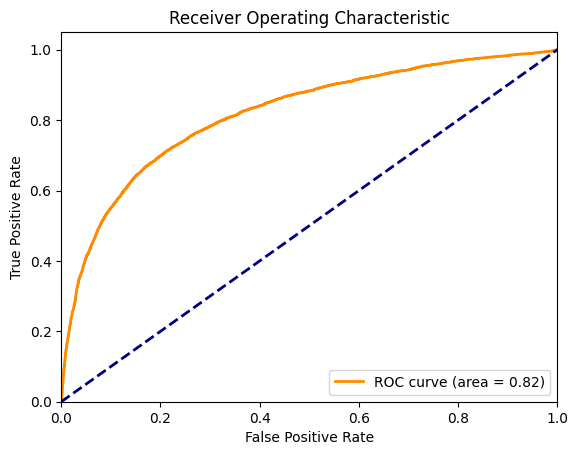

In [17]:
#getting the probabilities 
y_proba_best = best_model.predict_proba(X_test)
y_scores = y_proba_best[:, 1]


#Plotting the AUC and ROC curves
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

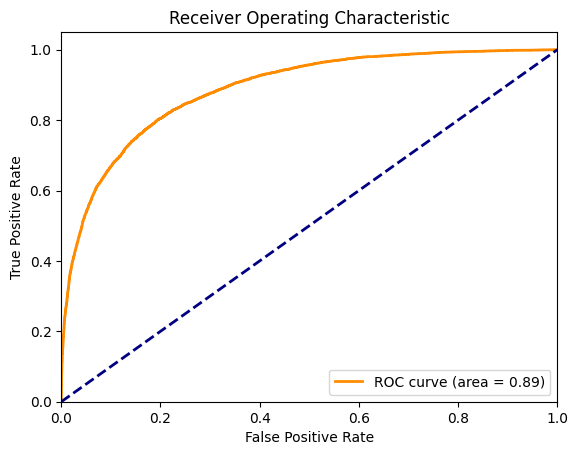

In [18]:
# Attempting an XGBoost model before moving on to deep learning models 
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')
xgb_clf.fit(X_train_smote, y_train_smote)
y_scores = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for the XGBoost model
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
#Hyperparameter tuning the XGBoost model
from sklearn.model_selection import RandomizedSearchCV

#Define the parameter list
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=25, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Get the best estimator
best_model = random_search.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.5}
Best Score: 0.8886964870655459


In [20]:
#The tree looks like it does not need hyperparameter tuning as such, since the score is still more or less the same. 
#However, it performs much better than logistic regression (not surprisingly)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007

Accuracy: 0.8678462144393614


In [21]:
#Looks like feed foward neural network is not really that useful. maybe try doing some feature engineeing
train.head()

,id,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,0,15674932,Okwudilichukwu,0.144135,1,-0.578074,-0.719973,-0.883163,0.814298,1.0,0.0,1.369486,0,True,False,False
1,1,15749177,Okwudiliolisa,-0.367706,1,-0.578074,-1.432694,-0.883163,0.814298,1.0,1.0,-1.254085,0,True,False,False
2,2,15694510,Hsueh,0.268974,1,0.211354,1.774548,-0.883163,0.814298,1.0,0.0,1.437422,0,True,False,False
3,3,15741417,Kao,-0.941966,1,-0.465299,-1.076334,1.486918,-1.013348,1.0,1.0,-0.557018,0,True,False,False
4,4,15766172,Chiemenam,0.743362,1,-0.578074,-0.007253,-0.883163,0.814298,1.0,1.0,-1.938770,0,False,False,True
